<a href="https://colab.research.google.com/github/Siddharth1047/Data-Science-Practice/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing all necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# INTRODUCTION: -
#### This is the Google Data Analytics Capstone Project (Problem 2)
#### Title: Bellabeat Case Study
#### Author: Siddharth Govardhane
---
### Case Study 2: How Can a Wellness Technology Company Play It Smart?
## Step 1: ASK
#### 1.0 Information about company: -
Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products.
Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around
the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with
knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly
positioned itself as a tech-driven wellness company for women.

#### 1.2 Bussiness Task: -
Analysing FitBit fitness Tracker Data to gain insights into how customers are using the Fitbit app and discover some patterns for marketing.

#### 1.3 Objectives: -
1. What are the trends identified?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

#### Stakeholders: -
1. Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer.
2. Sando Mur: Mathematician, Bellabeat’s cofounder.
3. Bellabeat marketing analytics team.
---
## Step 2: PREPARE
#### 2.1 Data Source: -
Data is from [Kaggle: FitBit Fitness](https://www.kaggle.com/datasets/arashnic/fitbit)

#### 2.2 Limitations: -
1. Data is from 2016.
2. Small sample size.
3. Third-Party Data

#### 2.3 Is Data ROCCC?
ROCCC (Reliable, Original, Comprehensive, Current, and Cited)
1. R - LOW
2. O - LOW
3. C - MEDIUM
4. C - NO
5. C - MAYBE (IDK)
Good for case study though. ;)
---
## Step 3: PROCESS
#### I'll be using python and it's libraries such as Pandas, NumPy, MatPlotlib and Seaborn.
#### BTW, I love Python.



In [2]:
# Read the dataset
df = pd.read_csv("/content/DailyActivity.csv")

# EDA

In [3]:
# Preview
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
# Check for null values
df.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

#### No null values. Great.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

### Conclusion: -
1. ActivityDate has dtype = object and will be converted to datetime64.
2. New column (TotalMins) = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes + SedentaryMinutes
3. New column Total Hours, convert TotalMins to Hours.
4. New column DayOfTheWeek.

In [6]:
df.shape

(940, 15)

In [7]:
# Convert Activity to datetime64
df["ActivityDate"] = pd.to_datetime(df["ActivityDate"], format = "%m/%d/%Y")
df.info()
# print first 5 rows
df["ActivityDate"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

0   2016-04-12
1   2016-04-13
2   2016-04-14
3   2016-04-15
4   2016-04-16
Name: ActivityDate, dtype: datetime64[ns]

In [8]:
# create a new list of rearranged columns
new_cols = ['Id', 'ActivityDate', 'DayOfTheWeek', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalExerciseMinutes', 'TotalExerciseHours', 'Calories']

# reindex function to rearrange columns based on "new_cols"
df_rearrange = df.reindex(columns=new_cols)
# preview
df_rearrange.head()

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


In [9]:
# Insert values in DayofTheWeek
df_rearrange["DayOfTheWeek"] = df_rearrange["ActivityDate"].dt.day_name()
#preview
df_rearrange["DayOfTheWeek"].head() 

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: DayOfTheWeek, dtype: object

In [10]:
# Input values in TotalExerciseMinutes
df_rearrange["TotalExerciseMinutes"] = df_rearrange["VeryActiveMinutes"] + df_rearrange["FairlyActiveMinutes"] + df_rearrange["LightlyActiveMinutes"] + df_rearrange["SedentaryMinutes"]
# preview
df_rearrange["TotalExerciseMinutes"].head()

0    1094
1    1033
2    1440
3     998
4    1040
Name: TotalExerciseMinutes, dtype: int64

In [12]:
# Input values in TotalExerciseHours
df_rearrange["TotalExerciseHours"] = round(df_rearrange["TotalExerciseMinutes"] / 60)
# preview
df_rearrange["TotalExerciseHours"].head()

0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
Name: TotalExerciseHours, dtype: float64

In [13]:
# Preview Again
df_rearrange.head()

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1094,18.0,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1033,17.0,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1440,24.0,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,998,17.0,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1040,17.0,1863


In [14]:
df_rearrange.tail()

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
935,8877689391,2016-05-08,Sunday,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,1440,24.0,2847
936,8877689391,2016-05-09,Monday,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,1440,24.0,3710
937,8877689391,2016-05-10,Tuesday,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,1440,24.0,2832
938,8877689391,2016-05-11,Wednesday,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,1440,24.0,3832
939,8877689391,2016-05-12,Thursday,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.00,23,1,137,770,931,16.0,1849


# EDA Complete
---
## Step 4: ANALYZE
We'll analyze some statistical data

In [15]:
df_rearrange.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,1218.753191,20.313830,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,265.931767,4.437283,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,989.750000,16.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,1440.000000,24.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,1440.000000,24.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,1440.000000,24.000000,4900.000000


### Conclusion: -
1. Average steps taken are 7637. Accordin to [Headline](https://www.healthline.com/health/how-many-steps-a-day#_noHeaderPrefixedContent) healthy people walk around 4000-10,000 steps per day. So this is great.
2. Average calories burned are 2303. According to [Another Heathline Article](https://www.healthline.com/health/fitness-exercise/how-many-calories-do-i-burn-a-day#:~:text=Every%20day%2C%20you%20burn%20calories,and%20activity%20levels%20(%201%20)) average calories burned by adult women're between 1600-2200. So this is great.
3. From the IQR (Inter Quartile Range) we can see that: -
- 25% women are below 3789 steps daily, which is concerning.
- Median == 7405
- 75% women take steps <= 10727, which is not sufficiant information to analyze anything.
---
## Step 5: SHARE
Visualize data.

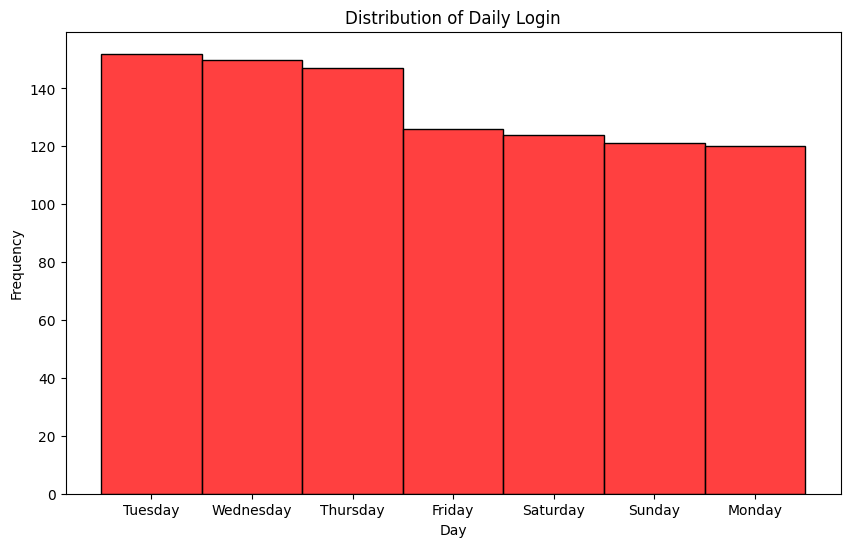

In [21]:
# Histogram
plt.figure(figsize = (10,6))
sns.histplot(data = df_rearrange, x = 'DayOfTheWeek', bins = 7, kde = False, color = 'red')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Login')
plt.show()

### Conclusion: -
1. Women tend to ignore Monday.I can relate ;)
2. Women start their streak from Tuesday.
3. Women tend to login less during weekends.

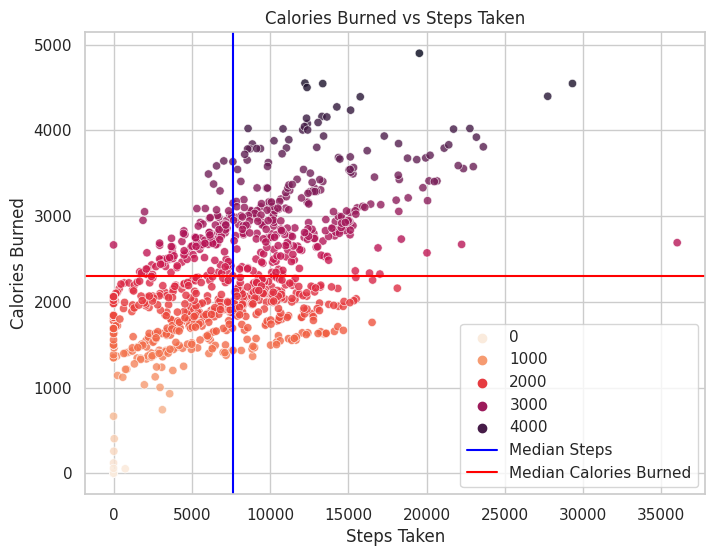

In [36]:
# Scatterplot of calories burned
sns.set(style = "whitegrid")
plt.figure(figsize = (8,6)) # figure size

# scatterplot
sns.scatterplot(x = 'TotalSteps', y = 'Calories', data = df_rearrange, alpha =0.8, hue = 'Calories', palette = 'rocket_r')

#add annotations
median_calories = 2303
median_steps = 7637

# some modifications
plt.axvline(median_steps, color = 'blue', label = 'Median Steps')
plt.axhline(median_calories, color = 'red', label = 'Median Calories Burned')
plt.xlabel('Steps Taken')
plt.ylabel('Calories Burned')
plt.title('Calories Burned vs Steps Taken')
plt.grid(True)
plt.legend()
plt.show()

### Conclusion: -
1. Calories burned depends on various other factors like age, physical fitness, etc.
2. By assuming everyone equal, the pattern seen here is- steps taken and calories burned as directly proportional (until a certain point).
3. Outliers are present.

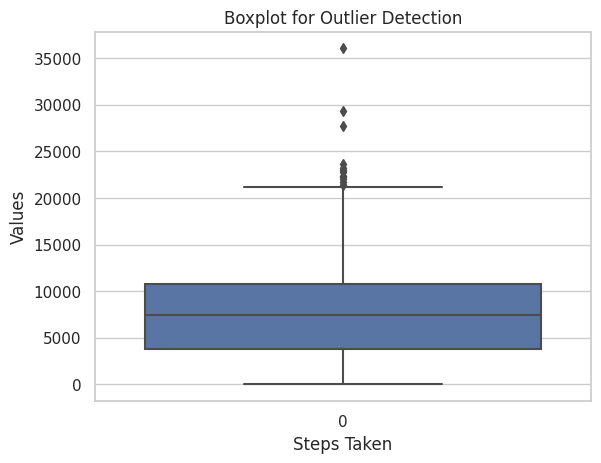

In [39]:
# finding outliers using boxplot
sns.boxplot(data = df_rearrange['TotalSteps'])
plt.xlabel('Steps Taken')
plt.ylabel('Values')
plt.title('Boxplot for Outlier Detection')
plt.show()

#### There are some outliers as you can see.
# Note: -
#### You can remove the outliers and plot again, but I decided not to as there will not be any major changes.

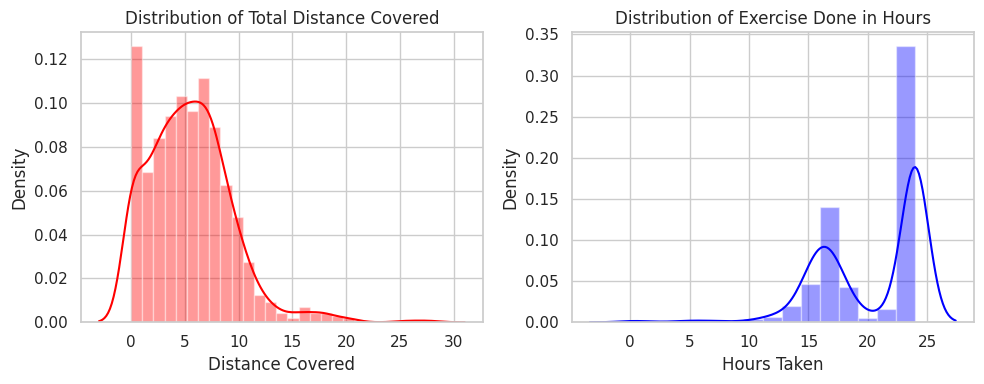

In [45]:
# Distance covered vs time taken
fig, axes = plt.subplots(1,2, figsize = (10,4))
# first distplot
sns.distplot(df_rearrange['TotalDistance'], kde = True, color = 'red', ax = axes[0])
axes[0].set_xlabel('Distance Covered')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution of Total Distance Covered')
# second distplot
sns.distplot(df_rearrange['TotalExerciseHours'], kde = True, color = 'blue', ax = axes[1])
axes[1].set_xlabel('Hours Taken')
axes[1].set_ylabel('Density')
axes[1].set_title('Distribution of Exercise Done in Hours')
# adjust spacing between subplots
plt.tight_layout()
plt.show()

### Conclusion (Distance): -
1. Highest density belongs to 0(zero) distance covered :)
2. Very few women cover 20+ KM.
3. Majority distribution is concentrated between 5-10 KM.

### Conclusion (Hours): -
- Let me clear something, the observation here might be misinterpreted by many.
- Hours of Exercise has high density between 15-24 hours. This does not mean women are exercising for that ridiculous amount of time.
- It means that women use or wear FitBit for that amount of time to track their health.
1. Low density for 0-10 hours.
2. Women are health conscious and love to track their health :)
3. FitBit watches must be more dynamic and tough, so as to not face errors frequently due to the high usage rate.  


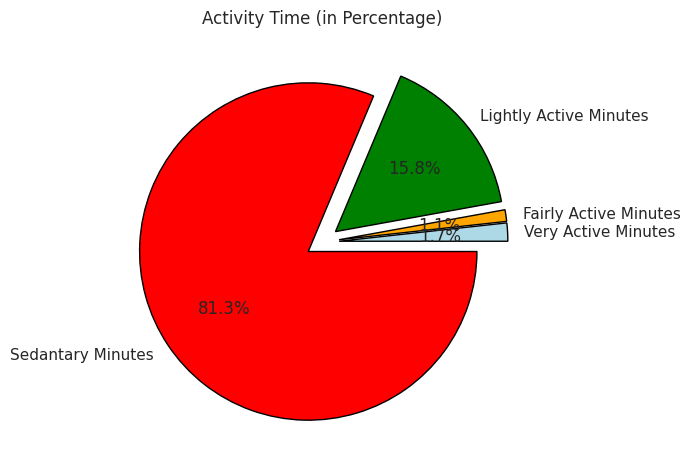

In [49]:
# Daily Activity
Very_Active_Mins = df_rearrange["VeryActiveMinutes"].sum()
Fairly_Active_Mins = df_rearrange["FairlyActiveMinutes"].sum()
Lightly_Active_Mins = df_rearrange["LightlyActiveMinutes"].sum()
Sedentary_Mins = df_rearrange["SedentaryMinutes"].sum()

# Defining Pie Chart
slices = [Very_Active_Mins, Fairly_Active_Mins, Lightly_Active_Mins, Sedentary_Mins]
labels = ["Very Active Minutes", "Fairly Active Minutes", "Lightly Active Minutes", "Sedantary Minutes"]
pie_colors = ["lightblue", "orange", "green", "red"]
explode = [0.1, 0.1, 0.1, 0.1]

# Create a pie chart
sns.set(style='whitegrid')
plt.pie(slices, labels = labels, colors = pie_colors, explode = explode, autopct="%1.1f%%", wedgeprops={"edgecolor": "black"})
plt.title("Activity Time (in Percentage)")
plt.tight_layout()
plt.show()

### Conclusion: -
1. Sedantary Minutes section has the highest value.
2. Very Active section has normal distribution as perform intensive exercise only a few minutes per day. 
3. Lightly active is second highest.(makes sense)
4. Exercise is not the top priority (although it is an important aspect)
---
## Step 6: ACT
Here are my insights.
1. Trends:
- Majority of tracking that FitBit does belongs to 'Sedantary Activity', less tracking of exercise.
- Tracking is highest for weekdays and low for weekends.
- Many women exercise regularly (atleast walking).

2. Applying these findings in our bussiness:
- Bellabeat should focus on awareness marketing.

3. Ideas:
- Reminder notifications can be used to remind women to exercise daily.
- Spreading awareness about exercise through certain events such as point based reward system or streak maintaining system.
- Proper device management or user manual should be provided.

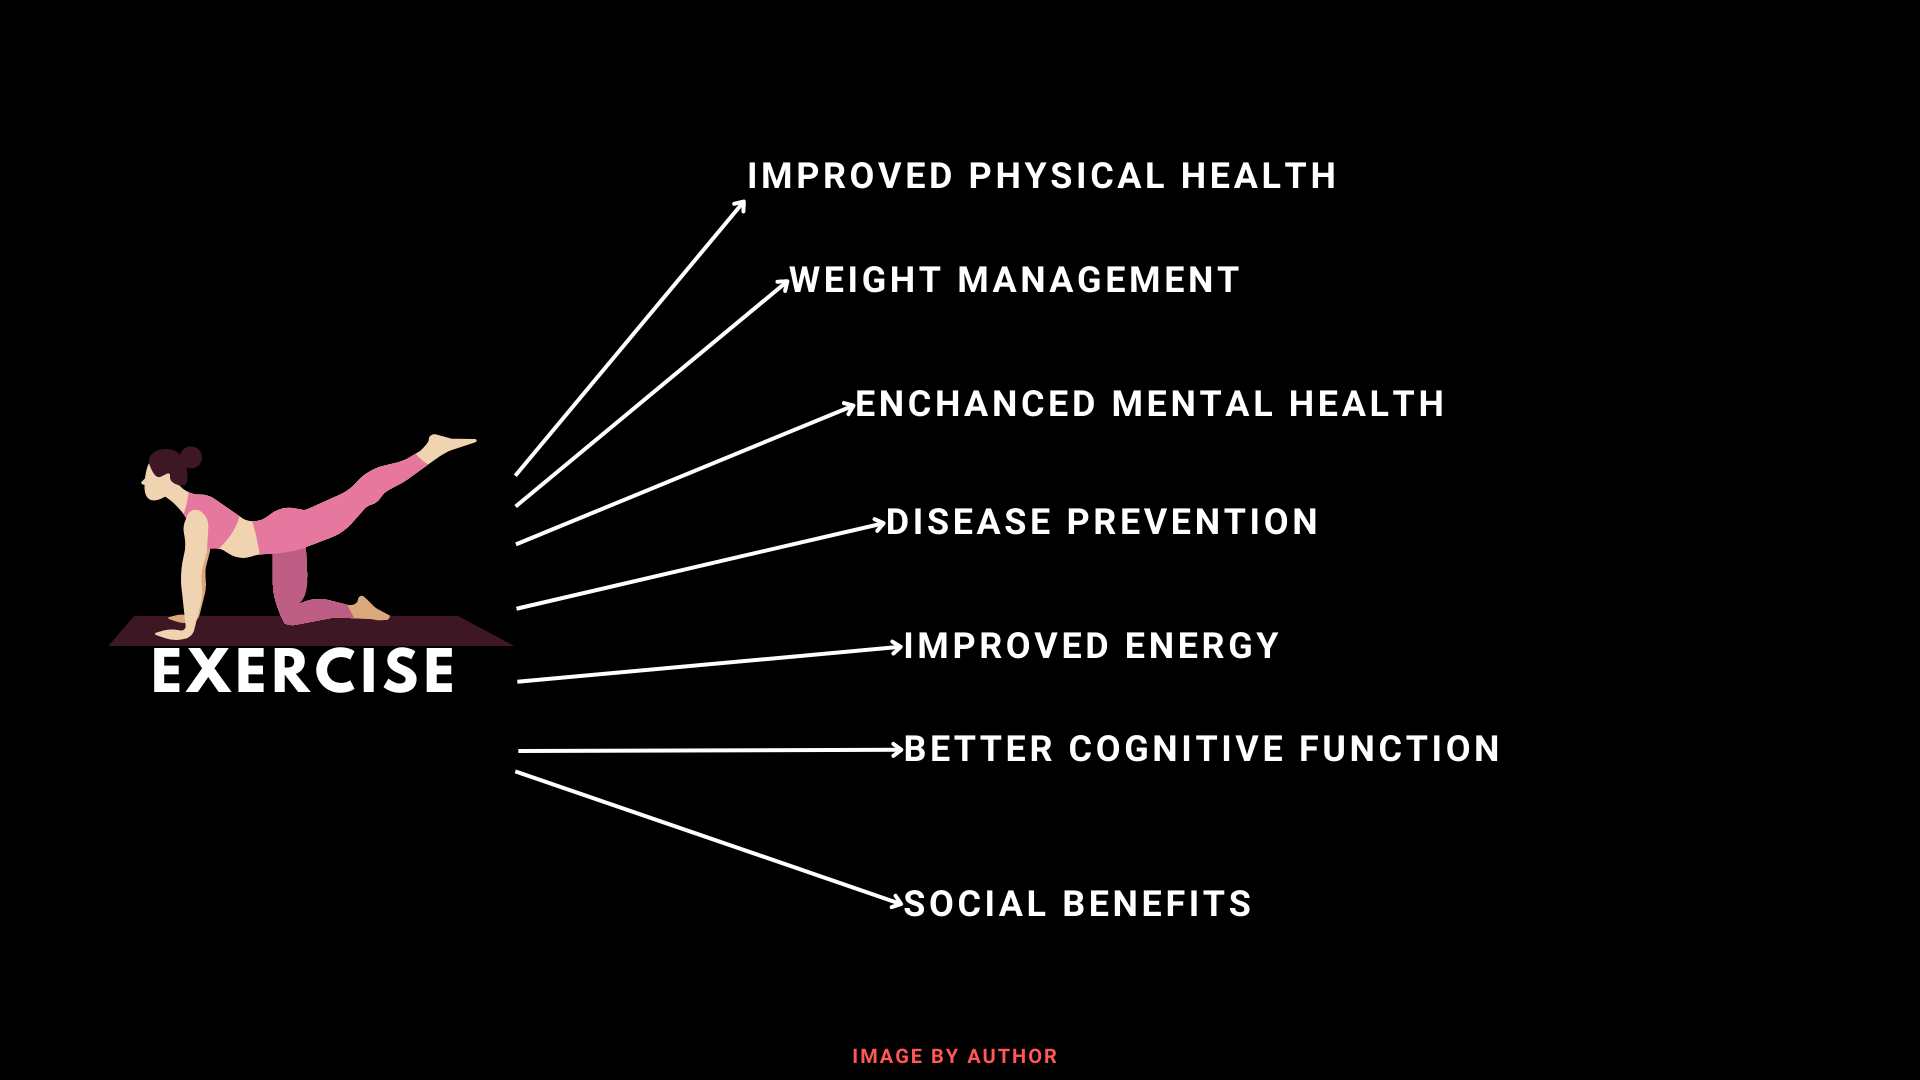

In [50]:
from PIL import Image
img = Image.open("/content/exercise.png")
img.show()

In [51]:
# THANK YOU FOR FOLLOWING ALONG ;)